In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# import RMSE,MSE,MAPE lib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../ETH-USD.csv')
df1=df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 82s 1s/step - loss: 0.0030 - val_loss: 0.1005
Epoch 2/100
18/18 [==============================] - 8s 446ms/step - loss: 4.4267e-04 - val_loss: 0.0054
Epoch 3/100
18/18 [==============================] - 8s 444ms/step - loss: 3.0976e-04 - val_loss: 0.0048
Epoch 4/100
18/18 [==============================] - 8s 464ms/step - loss: 2.8608e-04 - val_loss: 0.0058
Epoch 5/100
18/18 [==============================] - 9s 490ms/step - loss: 2.5756e-04 - val_loss: 0.0044
Epoch 6/100
18/18 [==============================] - 8s 475ms/step - loss: 2.4596e-04 - val_loss: 0.0048
Epoch 7/100
18/18 [==============================] - 9s 496ms/step - loss: 2.7097e-04 - val_loss: 0.0057
Epoch 8/100
18/18 [==============================] - 9s 500ms/step - loss: 2.4763e-04 - val_loss: 0.0077
Epoch 9/100
18/18 [==============================] - 9s 487ms/step - loss: 2.1395e-04 - val_loss: 0.0036
Epoch 10/100
18/18 [==============================] - 11s 640

18/18 [==============================] - 9s 521ms/step - loss: 7.8536e-05 - val_loss: 0.0074
Epoch 79/100
18/18 [==============================] - 8s 441ms/step - loss: 6.2637e-05 - val_loss: 0.0068
Epoch 80/100
18/18 [==============================] - 9s 475ms/step - loss: 5.5056e-05 - val_loss: 0.0052
Epoch 81/100
18/18 [==============================] - 8s 447ms/step - loss: 5.7584e-05 - val_loss: 0.0079
Epoch 82/100
18/18 [==============================] - 8s 445ms/step - loss: 6.2807e-05 - val_loss: 0.0066
Epoch 83/100
18/18 [==============================] - 8s 451ms/step - loss: 5.5199e-05 - val_loss: 0.0074
Epoch 84/100
18/18 [==============================] - 8s 431ms/step - loss: 5.3602e-05 - val_loss: 0.0052
Epoch 85/100
18/18 [==============================] - 8s 467ms/step - loss: 5.2185e-05 - val_loss: 0.0074
Epoch 86/100
18/18 [==============================] - 8s 445ms/step - loss: 5.6190e-05 - val_loss: 0.0125
Epoch 87/100
18/18 [==============================] - 8s 43

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

10/10 [==============================] - 1s 64ms/step


In [11]:
rmse = mean_squared_error(ytest, y_pred, squared=False)
print("RMSE on test set: {:.3f}".format(rmse))
rmse = mean_squared_error(yval, y_pred_val, squared=False)
print("RMSE on validation set: {:.3f}".format(rmse))
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE on test set: {:.3f}".format(mape))
mape = mean_absolute_percentage_error(yval, y_pred_val)
print("MAPE on validation set: {:.3f}".format(mape))
evs = explained_variance_score(ytest, y_pred)
print("The explained variance score (EVS) on test set: {:.3f}".format(evs))
evs = explained_variance_score(yval, y_pred_val)
print("The explained variance score (EVS) on validate set: {:.3f}".format(evs))

RMSE on test set: 0.091
RMSE on validation set: 0.012
MAPE on test set: 0.100
MAPE on validation set: 0.029
The explained variance score (EVS) on test set: 0.854
The explained variance score (EVS) on validate set: 0.949


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [13]:
# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30 and len(temp_input) >= n_steps:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.312541   0.30665137 0.28646695 0.28445698 0.29576433 0.31853956
 0.33757936 0.34248613 0.33247582 0.33692504 0.36130639 0.35478632
 0.35984512 0.34921534 0.36432591 0.34972208 0.36636586 0.35275263
 0.35100127 0.35775116 0.34501454 0.35713964 0.36141569 0.36135971
 0.36755393 0.36582765 0.36198811 0.36507391 0.37791462 0.38597525
 0.37832019 0.37677898 0.37336556 0.37545737 0.38641806 0.38239549
 0.38842209 0.4078715  0.42669659 0.42475726 0.43058221 0.42132565
 0.42731037 0.39174739 0.39316333 0.37347168 0.37859644 0.37602301
 0.37193979 0.37701537 0.37697529 0.38590595 0.38246383 0.38593358
 0.37916662 0.36965486 0.37786897 0.38503143 0.37933156 0.40415438
 0.38409441 0.37835273 0.37326922 0.37317624 0.3718645  0.36215362
 0.36459222 0.36207414 0.36300188 0.366608   0.36799798 0.36751957
 0.36326152 0.36555878 0.36722734 0.36385437 0.3666048  0.37439827
 0.36291706 0.36415522 0.36896423 0.36947792 0.38635601 0.38258341
 0.38426464 0.37857568 0.37605249 0.38558237 0.382

7 day output [[0.37086594]]
8 day input [0.33247582 0.33692504 0.36130639 0.35478632 0.35984512 0.34921534
 0.36432591 0.34972208 0.36636586 0.35275263 0.35100127 0.35775116
 0.34501454 0.35713964 0.36141569 0.36135971 0.36755393 0.36582765
 0.36198811 0.36507391 0.37791462 0.38597525 0.37832019 0.37677898
 0.37336556 0.37545737 0.38641806 0.38239549 0.38842209 0.4078715
 0.42669659 0.42475726 0.43058221 0.42132565 0.42731037 0.39174739
 0.39316333 0.37347168 0.37859644 0.37602301 0.37193979 0.37701537
 0.37697529 0.38590595 0.38246383 0.38593358 0.37916662 0.36965486
 0.37786897 0.38503143 0.37933156 0.40415438 0.38409441 0.37835273
 0.37326922 0.37317624 0.3718645  0.36215362 0.36459222 0.36207414
 0.36300188 0.366608   0.36799798 0.36751957 0.36326152 0.36555878
 0.36722734 0.36385437 0.3666048  0.37439827 0.36291706 0.36415522
 0.36896423 0.36947792 0.38635601 0.38258341 0.38426464 0.37857568
 0.37605249 0.38558237 0.38244261 0.38204096 0.3653978  0.38076791
 0.36974818 0.37268949 

15 day output [[0.37853014]]
16 day input [0.36636586 0.35275263 0.35100127 0.35775116 0.34501454 0.35713964
 0.36141569 0.36135971 0.36755393 0.36582765 0.36198811 0.36507391
 0.37791462 0.38597525 0.37832019 0.37677898 0.37336556 0.37545737
 0.38641806 0.38239549 0.38842209 0.4078715  0.42669659 0.42475726
 0.43058221 0.42132565 0.42731037 0.39174739 0.39316333 0.37347168
 0.37859644 0.37602301 0.37193979 0.37701537 0.37697529 0.38590595
 0.38246383 0.38593358 0.37916662 0.36965486 0.37786897 0.38503143
 0.37933156 0.40415438 0.38409441 0.37835273 0.37326922 0.37317624
 0.3718645  0.36215362 0.36459222 0.36207414 0.36300188 0.366608
 0.36799798 0.36751957 0.36326152 0.36555878 0.36722734 0.36385437
 0.3666048  0.37439827 0.36291706 0.36415522 0.36896423 0.36947792
 0.38635601 0.38258341 0.38426464 0.37857568 0.37605249 0.38558237
 0.38244261 0.38204096 0.3653978  0.38076791 0.36974818 0.37268949
 0.37140418 0.35282454 0.35304251 0.35073982 0.3500014  0.33127838
 0.34260762 0.34300035

23 day output [[0.3865857]]
24 day input [0.36755393 0.36582765 0.36198811 0.36507391 0.37791462 0.38597525
 0.37832019 0.37677898 0.37336556 0.37545737 0.38641806 0.38239549
 0.38842209 0.4078715  0.42669659 0.42475726 0.43058221 0.42132565
 0.42731037 0.39174739 0.39316333 0.37347168 0.37859644 0.37602301
 0.37193979 0.37701537 0.37697529 0.38590595 0.38246383 0.38593358
 0.37916662 0.36965486 0.37786897 0.38503143 0.37933156 0.40415438
 0.38409441 0.37835273 0.37326922 0.37317624 0.3718645  0.36215362
 0.36459222 0.36207414 0.36300188 0.366608   0.36799798 0.36751957
 0.36326152 0.36555878 0.36722734 0.36385437 0.3666048  0.37439827
 0.36291706 0.36415522 0.36896423 0.36947792 0.38635601 0.38258341
 0.38426464 0.37857568 0.37605249 0.38558237 0.38244261 0.38204096
 0.3653978  0.38076791 0.36974818 0.37268949 0.37140418 0.35282454
 0.35304251 0.35073982 0.3500014  0.33127838 0.34260762 0.34300035
 0.347031   0.35218781 0.35760069 0.36274236 0.36723769 0.37086594
 0.37355983 0.3753828

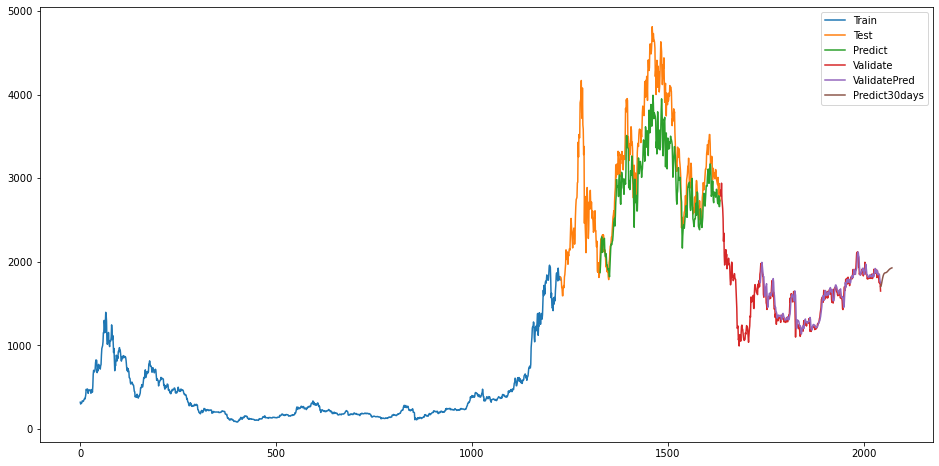

In [14]:
# 14.Vẽ hình
plt.subplots(figsize=(16, 8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()